In [35]:
import meaRecording
import interleaved_to_chunk as i2c
import pdb

In [2]:
mea = meaRecording.MEA('Default.bin')

In [3]:
fid = open('150326_FIFO', 'rb')

In [4]:
chunk_size = 64*20000

In [5]:
fid.seek(5168)

5168

In [6]:
data = fid.read(chunk_size*2)

In [7]:
pd = fromstring(data, '<H')

In [8]:
pd = pd.reshape(20000,64)

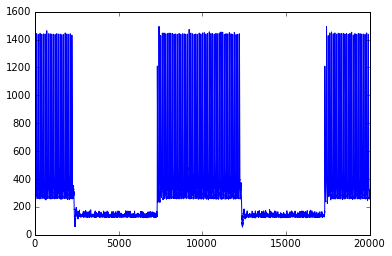

In [9]:
plot(pd[:,0])

output some of the values

In [10]:
pd[:10,0]

array([ 357,  354,  361,  366,  377,  388,  398,  499,  724, 1004], dtype=uint16)

In [11]:
data[:2]

b'e\x01'

In [12]:
print(data[0], data[1], data[:2])

101 1 b'e\x01'


In [14]:
a=[1,2,3]

In [15]:
bytes(a)

b'\x01\x02\x03'

In [49]:
def writeChunk(fid, chunk, channelsN):
    '''
    chunk is a bytes string, each number is represented by two bytes and they are in interleaved format
    I want to write first all data for channel0, then all data for channel1 and so forth.
    
    fid:       output of open, a file object
    chunk:     a string of bytes objects
    channelsN: number of channels in chunk
    '''
    
    # I'm going to loop through the output file, inserting 2 bytes at a time of data
    # from 'chunk'
    channel_samples = len(chunk)//2//channelsN;
    for ch in range(channelsN):
        channel_start = 2 * channel_samples * ch
        for j in range(channel_samples):
#            print(ch*2 + j*2*channelsN, ch*2+j*2*channelsN+1)
            fid.write(chunk[ch*2 + j*2*channelsN: ch*2 + j*2*channelsN+2])



In [50]:
def reshape_data(header_in, FIFO_in, f_out):
    mea = meaRecording.MEA(header_in)
    mea.writeHeader(f_out)
    
    out_fid = open(f_out, 'ab')
    fifo_fid = open(FIFO_in, 'rb')
    
    channelsN = len(mea.whichChan)
    chunk_size = channelsN * mea.blockSize
    
    pdb.set_trace()
    i=0
    while True:
        chunk = fifo_fid.read(chunk_size * 2)
        
        if len(chunk) < chunk_size*2:
            break
        
        print("about to write chunk: ", i)
        writeChunk(out_fid, chunk, channelsN)
        i+=1

In [51]:
reshape_data('150326.bin', '150326_FIFO', 'test')


> <ipython-input-50-22379a590f9c>(12)reshape_data()
-> i=0
(Pdb) n
> <ipython-input-50-22379a590f9c>(13)reshape_data()
-> while True:
(Pdb) 
> <ipython-input-50-22379a590f9c>(14)reshape_data()
-> chunk = fifo_fid.read(chunk_size * 2)
(Pdb) 
> <ipython-input-50-22379a590f9c>(16)reshape_data()
-> if len(chunk) < chunk_size*2:
(Pdb) 
> <ipython-input-50-22379a590f9c>(19)reshape_data()
-> print("about to write chunk: ", i)
(Pdb) 
about to write chunk:  0
> <ipython-input-50-22379a590f9c>(20)reshape_data()
-> writeChunk(out_fid, chunk, channelsN)
(Pdb) 
> <ipython-input-50-22379a590f9c>(21)reshape_data()
-> i+=1
(Pdb) 
> <ipython-input-50-22379a590f9c>(14)reshape_data()
-> chunk = fifo_fid.read(chunk_size * 2)
(Pdb) 
> <ipython-input-50-22379a590f9c>(16)reshape_data()
-> if len(chunk) < chunk_size*2:
(Pdb) 
> <ipython-input-50-22379a590f9c>(19)reshape_data()
-> print("about to write chunk: ", i)
(Pdb) 
about to write chunk:  1
> <ipython-input-50-22379a590f9c>(20)reshape_data()
-> writeChun

In [ ]:
fid2 = open('test', 'rb')


Read first 4-bytes from header

In [53]:
fid = open('150326.bin', 'rb')
a = fid.read(4)
headerSize = fromstring(a, '>I')
print(headerSize)
fid.close()

[216]


write a to file

In [55]:
fid = open('test', 'wb')
fid.write(a)
fid.close()

read a back from test

In [56]:
fid = open('test', 'rb')
a = fid.read(4)
print(a)
print(fromstring(a, '>I'))
fid.close

b'\x00\x00\x00\xd8'
[216]


<function BufferedReader.close>

In [70]:
def mytest():
    n = 10
    # read data after header
    fid = open('150326_FIFO', 'rb')
    fid.seek(5168)
    a = fid.read(2*n)
    headerSize = fromstring(a, '<H')
    print("original data")
    print(a)
    print(headerSize)
    fid.close()
    
    # write data to test files
    fid = open('test', 'wb')
    print("writing to file: ", a)
    fid.write(a)
    fid.close()

    # read written data again
    fid = open('test', 'rb')
    a = fid.read(2*n)
    print(a)
    print(fromstring(a, '<H'))
    fid.close

In [71]:
mytest()

original data
b'e\x01\xb7\xff\xb3\xff\xc0\xff\x1b\x02\xa2\x02;\x03\x89\x03A\x042\x04'
[  357 65463 65459 65472   539   674   827   905  1089  1074]
writing to file:  b'e\x01\xb7\xff\xb3\xff\xc0\xff\x1b\x02\xa2\x02;\x03\x89\x03A\x042\x04'
b'e\x01\xb7\xff\xb3\xff\xc0\xff\x1b\x02\xa2\x02;\x03\x89\x03A\x042\x04'
[  357 65463 65459 65472   539   674   827   905  1089  1074]


In [72]:
76*64+304

5168